## Buy and Hold Strategy

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ffn
import bt

%matplotlib inline

### Create Fake Index Data

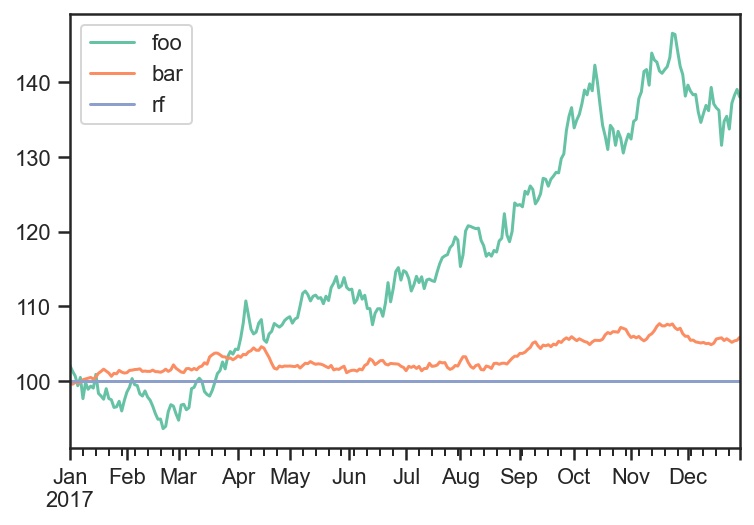

In [22]:
names = ['foo','bar','rf']
dates = pd.date_range(start='2017-01-01',end='2017-12-31', freq=pd.tseries.offsets.BDay())
n = len(dates)
rdf = pd.DataFrame(
    np.zeros((n, len(names))),
    index = dates,
    columns = names
)

np.random.seed(1)
rdf['foo'] = np.random.normal(loc = 0.1/n,scale=0.2/np.sqrt(n),size=n)
rdf['bar'] = np.random.normal(loc = 0.04/n,scale=0.05/np.sqrt(n),size=n)
rdf['rf'] = 0.

pdf = 100*np.cumprod(1+rdf)
pdf.plot();

### Build Strategy

In [23]:
# algo to fire on the beginning of every month and to run on the first date
runMonthlyAlgo = bt.algos.RunMonthly(
    run_on_first_date=True
)

# algo to set the weights
#  it will only run when runMonthlyAlgo returns true
#  which only happens on the first of every month
weights = pd.Series([0.6,0.4,0.],index = rdf.columns)
weighSpecifiedAlgo = bt.algos.WeighSpecified(**weights)

# algo to rebalance the current weights to weights set by weighSpecified
#  will only run when weighSpecifiedAlgo returns true
#  which happens every time it runs
rebalAlgo = bt.algos.Rebalance()

# a strategy that rebalances monthly to specified weights
strat = bt.Strategy('static',
    [
        runMonthlyAlgo,
        weighSpecifiedAlgo,
        rebalAlgo
    ]
)

### Run Backtest

Note: The logic of the strategy is seperate from the data used in the backtest.

In [24]:
# set integer_positions=False when positions are not required to be integers(round numbers)
backtest = bt.Backtest(
    strat,
    pdf,
    integer_positions=False
)

res = bt.run(backtest)

In [25]:
res.stats

,static
start,2017-01-01 00:00:00
end,2017-12-29 00:00:00
rf,0.0
total_return,0.229372
cagr,0.231653
max_drawdown,-0.069257
calmar,3.344851
mtd,-0.000906
three_month,0.005975
six_month,0.142562


In [26]:
res.prices.head()

,static
2017-01-01,100.000000
2017-01-02,100.000000
2017-01-03,99.384719
2017-01-04,99.121677
2017-01-05,98.316364


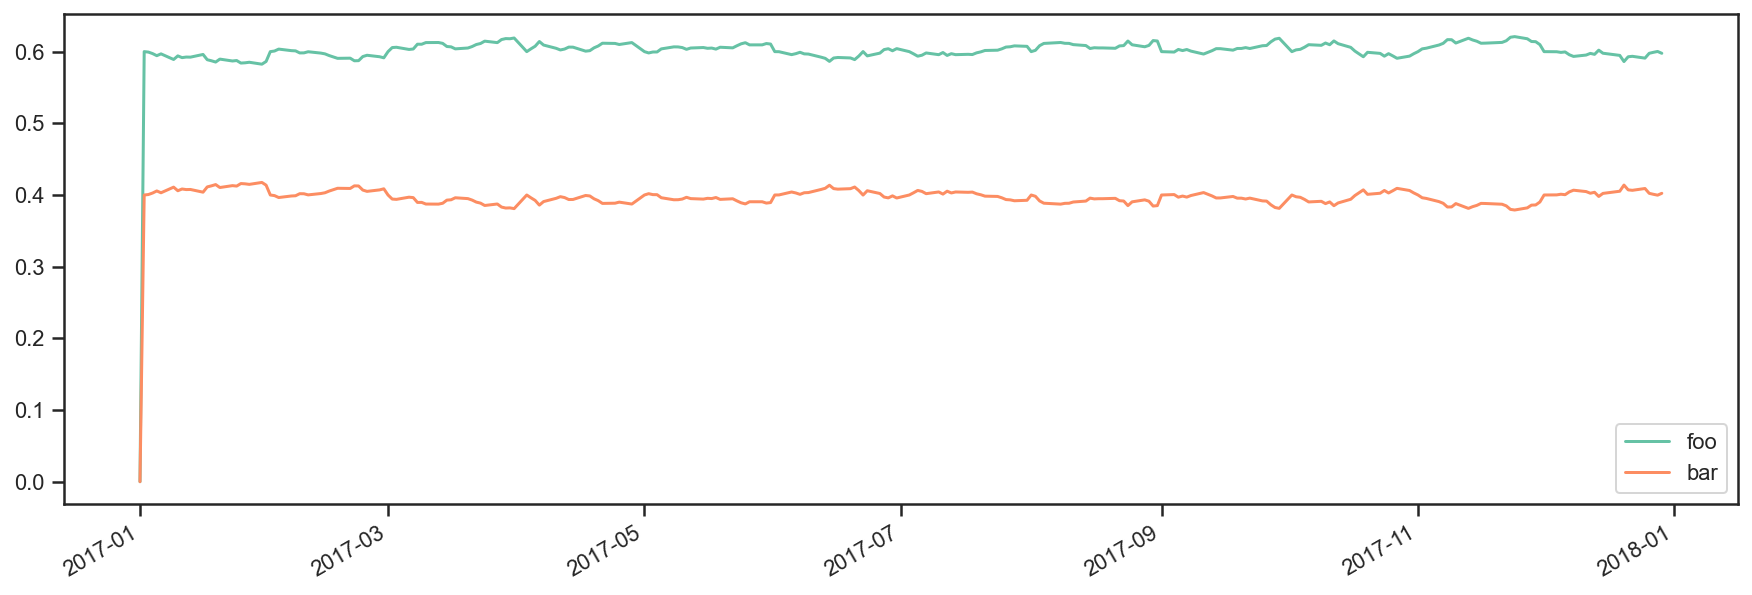

In [27]:
res.plot_security_weights()

Strategy value over time

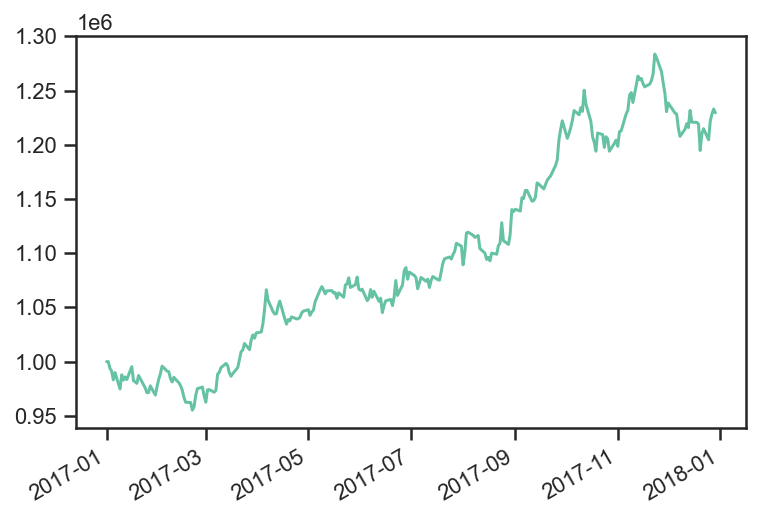

In [28]:
performanceStats = res['static']
#performance stats is an ffn object
res.backtest_list[0].strategy.values.plot();

Strategy Outlays

Outlays are the total dollar amount spent(gained) by a purchase(sale) of securities.

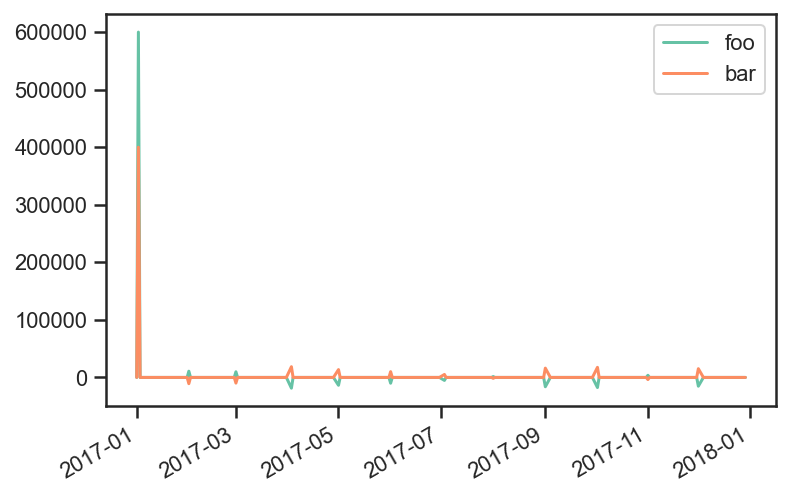

In [29]:
res.backtest_list[0].strategy.outlays.plot();

You can get the change in number of shares purchased a

In [30]:
security_names = res.backtest_list[0].strategy.outlays.columns


res.backtest_list[0].strategy.outlays/pdf.loc[:,security_names]
res.backtest_list[0].positions.diff(1)
res.backtest_list[0].positions

,foo,bar
2017-01-01,0.000000,0.000000
2017-01-02,5879.285683,3998.068018
2017-01-03,5879.285683,3998.068018
2017-01-04,5879.285683,3998.068018
2017-01-05,5879.285683,3998.068018
...,...,...
2017-12-25,5324.589093,4673.239436
2017-12-26,5324.589093,4673.239436
2017-12-27,5324.589093,4673.239436
2017-12-28,5324.589093,4673.239436
